In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import datetime 

In [2]:
# fonction
def test_primary_key(df, column):
        if len(df) == len(df[column].drop_duplicates()):
                print("la clé  est unique")
        else : print('la clé n est pas unique')

In [3]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# Mission 1 : Nettoyage

### On regarde à quoi ressemble nos tables customers, products et transactions

In [4]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [5]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [6]:
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [7]:
#On a plusieurs tables avec des variables similaires

In [8]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [9]:
products['categ'].unique()

#On a 3 catégories de produits dans products

array([0, 1, 2], dtype=int64)

In [10]:
price_count = pd.DataFrame(products['price'].value_counts())
price_count

,price
4.99,85
6.99,84
3.99,80
5.99,78
8.99,74
...,...
6.50,1
5.40,1
10.89,1
5.25,1


### On regarde s'il y a des valeurs manquantes dans nos tables

In [11]:
print (products.isin(['NaN']).any())
print('________')
print (transactions.isin(['NaN']).any())
print('________')
print (customers.isin(['NaN']).any())

id_prod    False
price      False
categ      False
dtype: bool
________
id_prod       False
date          False
session_id    False
client_id     False
dtype: bool
________
client_id    False
sex          False
birth        False
dtype: bool


On a donc pas de valeurs manquantes

### On regarde quelles sont les clés primaires dans nos tables

In [12]:
test_primary_key(transactions, ['date'])

la clé n est pas unique


In [13]:
test_primary_key(products, ['id_prod'])

la clé  est unique


In [14]:
test_primary_key(customers, ['client_id'])

la clé  est unique


### Ici, id_prod est clé primaire de la table products, client_id est clé primaire de la table customers

In [15]:
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [16]:
transactions.sort_values(by='date', ascending=True)

,id_prod,date,session_id,client_id
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
95285,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
216737,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
180767,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
293481,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
317345,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
203418,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
203239,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
245346,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1


### Là on remarque des valeurs de test dans notre dataframe transactions. On les enlève

In [17]:
#Au préalable on crée une fonction pour connaître notre nombre de ligne supprimées
def pourcentage_supprimé(df, df_supprimé):
    print('Le pourcentage de lignes supprimées est de: {:.4f}'.format(len(df_supprimé)/len(df)*100), '%.',\
          '{}'.format(len(df_supprimé)), 'lignes ont été supprimées' ) 
    print('sur {}'.format(len(df_supprimé)+len(df)))


#### Valeurs de test enlevées dans transactions

In [18]:
transactions_supprimées = transactions.loc[transactions['id_prod'].isin(['T_0']), :]
transactions = transactions.loc[~transactions['id_prod'].isin(['T_0']), :]

In [19]:
pourcentage_supprimé(transactions, transactions_supprimées)

Le pourcentage de lignes supprimées est de: 0.0594 %. 200 lignes ont été supprimées
sur 337016


#### Valeurs de test enlevées dans products

In [20]:
products_supprimées = products.loc[products['id_prod'].isin(['T_0']), :]
products = products.loc[~products['id_prod'].isin(['T_0']), :]

In [21]:
pourcentage_supprimé(products, products_supprimées)

Le pourcentage de lignes supprimées est de: 0.0304 %. 1 lignes ont été supprimées
sur 3287


#### Valeurs de test enlevées dans customers

In [22]:
liste_customers_a_supprimer = ['ct_1', 'ct_0'] 
customers_supprimés = customers.loc[customers['client_id'].isin(liste_customers_a_supprimer), :]

customers = customers.loc[~customers['client_id'].isin(liste_customers_a_supprimer), :]

In [23]:
pourcentage_supprimé(customers, customers_supprimés)

Le pourcentage de lignes supprimées est de: 0.0232 %. 2 lignes ont été supprimées
sur 8623


#### balise

### On comptabilise le nombre de valeurs manquantes par variable

In [24]:
print(transactions.isnull().sum())
print(customers.isnull().sum())
print(products.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64
client_id    0
sex          0
birth        0
dtype: int64
id_prod    0
price      0
categ      0
dtype: int64


### On regarde s'il y a des doublons

In [25]:
print(customers.loc[customers['client_id'].duplicated(keep=False),:])
print('dans customers pas de doublons \n')
#
print(products.loc[products['id_prod'].duplicated(keep=False),:])
print('dans products pas de doublons \n')
#
print(transactions.loc[transactions['date'].duplicated(keep=False),:])
print('dans transactions pas de doublons \n')

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []
dans customers pas de doublons 

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
dans products pas de doublons 

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []
dans transactions pas de doublons 



## Time series par mois - Recherche d'une anomalie sur les dates


In [26]:
transactions.sort_values(by='session_id')

,id_prod,date,session_id,client_id
176588,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
309544,1_635,2021-03-01 00:10:33.163037,s_10,c_2218
42033,0_1451,2021-03-01 04:43:58.025677,s_100,c_3854
148924,0_1030,2021-03-01 04:12:43.572994,s_100,c_3854
328736,0_1590,2021-03-03 02:49:03.169115,s_1000,c_1014
...,...,...,...,...
195828,0_1475,2021-10-04 18:45:05.640783,s_99996,c_4900
91103,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521
251881,0_1572,2021-10-04 18:45:54.374885,s_99998,c_2795
8129,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795


In [27]:
transactions2 = transactions.copy()
transactions = transactions.copy()
#doc python des times : https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
transactions['date']=pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S.%f')
transactions['mois'] = transactions['date'].dt.month
transactions['annee'] = transactions['date'].dt.year
transactions['jour'] = transactions['date'].dt.day
transactions

,id_prod,date,session_id,client_id,mois,annee,jour
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4,2021,10
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2,2022,3
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,9,2021,23
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,10,2021,17
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,7,2021,17
...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,5,2021,28
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,6,2021,19
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,3,2021,16
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,10,2021,30


In [28]:
transactions['annee'].nunique()
#ici on a une variable continue. Il faut donc la regrouper en classes. Ici ce sera donc les mois.

2

In [29]:
#une seule colonne année-mois
#c'est l'aggrégation/discrétisation de notre variable continue

transactions3 = transactions[['mois', 'annee','session_id']].groupby(['mois', 'annee'])['session_id'].agg(['count']).reset_index()
transactions3

,mois,annee,count
0,1,2022,29316
1,2,2022,29567
2,3,2021,28568
3,4,2021,28415
4,5,2021,28245
5,6,2021,26819
6,7,2021,24716
7,8,2021,25619
8,9,2021,33266
9,10,2021,21584


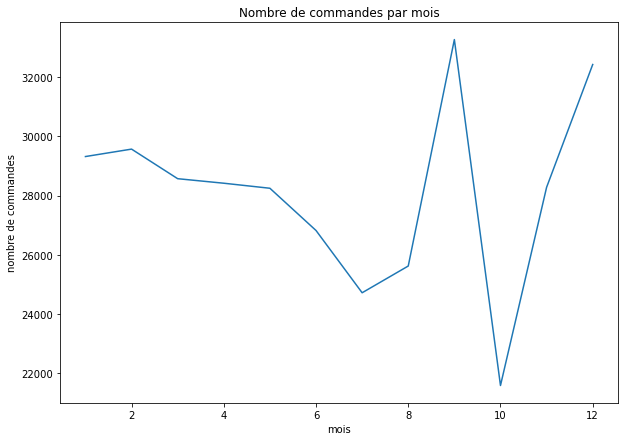

In [30]:
plt.figure(figsize=(10,7))
plt.axes()
plt.plot(transactions3[['mois']], transactions3['count'])
plt.title("Nombre de commandes par mois")
plt.xlabel('mois')
plt.ylabel('nombre de commandes')
plt.show()

Ici on remarque qu'en octobre on a une anomalie.

In [31]:
temp_octobre = transactions[transactions['mois'] == 10].groupby(['jour']).agg(['count']).reset_index()
temp_octobre

,jour,id_prod,date,session_id,client_id,mois,annee
,,count,count,count,count,count,count
0,1,1043,1043,1043,1043,1043,1043
1,2,687,687,687,687,687,687
2,3,677,677,677,677,677,677
3,4,639,639,639,639,639,639
4,5,632,632,632,632,632,632
5,6,726,726,726,726,726,726
6,7,623,623,623,623,623,623
7,8,713,713,713,713,713,713
8,9,675,675,675,675,675,675


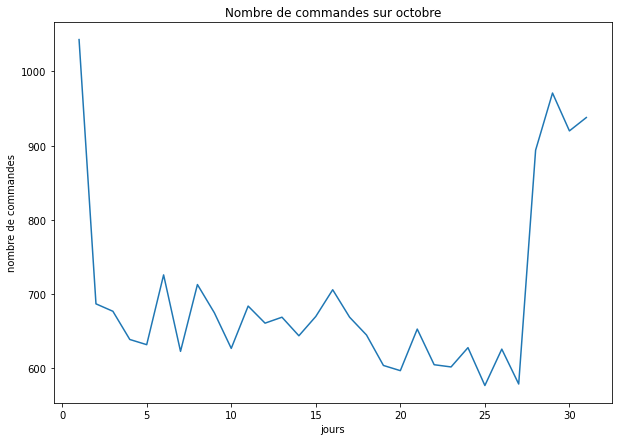

In [32]:
plt.figure(figsize=(10,7))
plt.axes()
plt.plot(temp_octobre['jour'], temp_octobre['id_prod'])
plt.title("Nombre de commandes sur octobre")
plt.xlabel('jours')
plt.ylabel('nombre de commandes')
plt.show()

On a un soucis entre le 2 et le 27 octobre. Le nombre de produits est anormalement bas.

In [33]:
transactions = transactions.loc[~((transactions['mois'] == 10) & (transactions['jour'] >= 2) & (transactions['jour'] <= 27)) , :]

# Merge

In [34]:
#outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.

In [35]:
#Maintenant que l'on a nettoyé, verifions si nos clés sont uniques

print(test_primary_key(transactions, ['date']))
print(test_primary_key(products, ['id_prod']))
print(test_primary_key(customers, ['client_id']))

la clé  est unique
None
la clé  est unique
None
la clé  est unique
None


In [36]:
df_ventes2 = pd.merge(transactions, products, how = 'outer', indicator=True)
df_ventes2['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [37]:
products.head(1)

,id_prod,price,categ
0,0_1421,19.99,0


In [38]:
df_ventes2[df_ventes2['_merge'] == 'left_only']

,id_prod,date,session_id,client_id,mois,annee,jour,price,categ,_merge
290920,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,6.0,2021.0,17.0,NaN,NaN,left_only
290921,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,6.0,2021.0,16.0,NaN,NaN,left_only
290922,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,11.0,2021.0,24.0,NaN,NaN,left_only
290923,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,2.0,2022.0,28.0,NaN,NaN,left_only
290924,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,3.0,2021.0,1.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
291011,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,4.0,2021.0,6.0,NaN,NaN,left_only
291012,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,3.0,2021.0,30.0,NaN,NaN,left_only
291013,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,12.0,2021.0,3.0,NaN,NaN,left_only
291014,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,4.0,2021.0,27.0,NaN,NaN,left_only


In [39]:
df_ventes = pd.merge(transactions, customers, how = 'outer', indicator=True)

In [40]:
df_ventes = pd.merge(df_ventes, products, how = 'outer', indicator='_merge2')

In [41]:
df_ventes.sort_values(by = ['date'], ascending=False)

,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2
257641,0_1775,2022-02-28 23:59:58.040472,s_172423,c_1460,2.0,2022.0,28.0,m,1989.0,both,6.99,0.0,both
200149,0_1403,2022-02-28 23:59:02.381670,s_172423,c_1460,2.0,2022.0,28.0,m,1989.0,both,15.99,0.0,both
236739,0_1538,2022-02-28 23:57:12.741573,s_172424,c_1876,2.0,2022.0,28.0,m,1983.0,both,8.61,0.0,both
37780,1_370,2022-02-28 23:56:57.561424,s_172423,c_1460,2.0,2022.0,28.0,m,1989.0,both,13.11,1.0,both
119230,1_456,2022-02-28 23:56:57.196281,s_172422,c_5787,2.0,2022.0,28.0,f,1986.0,both,28.27,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320039,0_525,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only
320040,2_86,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.36,2.0,right_only
320041,0_299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.99,0.0,right_only
320042,0_510,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.66,0.0,right_only


In [43]:
df_ventes.sort_values(by = ['date'], ascending=True)

,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2
217599,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,3.0,2021.0,1.0,f,1967.0,both,11.99,0.0,both
236181,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,3.0,2021.0,1.0,m,1960.0,both,19.37,0.0,both
139945,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,3.0,2021.0,1.0,m,1988.0,both,4.50,0.0,both
40731,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,3.0,2021.0,1.0,f,1989.0,both,6.55,0.0,both
105524,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,3.0,2021.0,1.0,f,1956.0,both,16.49,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320039,0_525,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only
320040,2_86,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.36,2.0,right_only
320041,0_299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.99,0.0,right_only
320042,0_510,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.66,0.0,right_only


## On ne garde que les merge 'both'. Le reste est stocké dans les dataframes ventes_supprimées

In [47]:
df_ventes_supprimées_right_only = df_ventes.loc[df_ventes['_merge'].isin(['right_only']), :]
df_ventes_supprimées_left_only = df_ventes.loc[df_ventes['_merge2'].isin(['left_only']), :]

df_ventes = df_ventes.loc[df_ventes['_merge'].isin(['both']), :]
df_ventes = df_ventes.loc[df_ventes['_merge2'].isin(['both']), :]
df_ventes.sort_values(by = '_merge', ascending = True)

,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.0,2021.0,10.0,f,1977.0,both,4.99,0.0,both
213367,1_576,2021-10-29 14:55:11.506424,s_111849,c_3454,10.0,2021.0,29.0,m,1969.0,both,17.20,1.0,both
213366,1_576,2021-05-02 05:30:45.947405,s_28731,c_7297,5.0,2021.0,2.0,f,1991.0,both,17.20,1.0,both
213365,1_576,2021-03-15 21:18:56.450212,s_6800,c_152,3.0,2021.0,15.0,m,1990.0,both,17.20,1.0,both
213364,1_576,2021-06-04 22:56:33.436544,s_44146,c_1609,6.0,2021.0,4.0,m,1980.0,both,17.20,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106727,1_406,2022-02-21 14:57:39.575676,s_168680,c_6881,2.0,2022.0,21.0,m,1980.0,both,24.81,1.0,both
106726,1_406,2021-10-30 13:20:23.276437,s_112285,c_3320,10.0,2021.0,30.0,m,1976.0,both,24.81,1.0,both
106725,1_406,2021-07-15 11:21:15.554594,s_62600,c_3553,7.0,2021.0,15.0,f,1965.0,both,24.81,1.0,both
106732,1_406,2022-02-07 06:22:12.696787,s_161242,c_8169,2.0,2022.0,7.0,m,1963.0,both,24.81,1.0,both


### customers n'ayant pas consommé

In [48]:
df_ventes_supprimées_right_only

,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2
319998,NaN,NaT,NaN,c_8253,NaN,NaN,NaN,f,2001.0,right_only,NaN,NaN,left_only
319999,NaN,NaT,NaN,c_8351,NaN,NaN,NaN,f,1968.0,right_only,NaN,NaN,left_only
320000,NaN,NaT,NaN,c_3789,NaN,NaN,NaN,f,1997.0,right_only,NaN,NaN,left_only
320001,NaN,NaT,NaN,c_4406,NaN,NaN,NaN,f,1998.0,right_only,NaN,NaN,left_only
320002,NaN,NaT,NaN,c_2706,NaN,NaN,NaN,f,1967.0,right_only,NaN,NaN,left_only
320003,NaN,NaT,NaN,c_3443,NaN,NaN,NaN,m,1959.0,right_only,NaN,NaN,left_only
320004,NaN,NaT,NaN,c_4447,NaN,NaN,NaN,m,1956.0,right_only,NaN,NaN,left_only
320005,NaN,NaT,NaN,c_3017,NaN,NaN,NaN,f,1992.0,right_only,NaN,NaN,left_only
320006,NaN,NaT,NaN,c_4086,NaN,NaN,NaN,f,1992.0,right_only,NaN,NaN,left_only
320007,NaN,NaT,NaN,c_6930,NaN,NaN,NaN,m,2004.0,right_only,NaN,NaN,left_only


### produit qui n'ont pas de clients

In [49]:
df_ventes_supprimées_left_only

,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2
29979,0_2245,2021-04-10 06:15:32.619826,s_18510,c_277,4.0,2021.0,10.0,f,2000.0,both,NaN,NaN,left_only
29980,0_2245,2021-12-10 21:31:18.303110,s_132471,c_3519,12.0,2021.0,10.0,m,1974.0,both,NaN,NaN,left_only
29981,0_2245,2021-04-10 09:22:57.768041,s_18566,c_8240,4.0,2021.0,10.0,f,1978.0,both,NaN,NaN,left_only
29982,0_2245,2021-03-28 21:39:14.337424,s_12792,c_2688,3.0,2021.0,28.0,f,1968.0,both,NaN,NaN,left_only
29983,0_2245,2021-08-06 01:51:40.749182,s_71925,c_2039,8.0,2021.0,6.0,f,1982.0,both,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320015,NaN,NaT,NaN,c_862,NaN,NaN,NaN,f,1956.0,right_only,NaN,NaN,left_only
320016,NaN,NaT,NaN,c_7584,NaN,NaN,NaN,f,1960.0,right_only,NaN,NaN,left_only
320017,NaN,NaT,NaN,c_90,NaN,NaN,NaN,m,2001.0,right_only,NaN,NaN,left_only
320018,NaN,NaT,NaN,c_587,NaN,NaN,NaN,m,1993.0,right_only,NaN,NaN,left_only


In [50]:
pourcentage_supprimé(df_ventes, df_ventes_supprimées_right_only)
pourcentage_supprimé(df_ventes, df_ventes_supprimées_left_only)

Le pourcentage de lignes supprimées est de: 0.0069 %. 22 lignes ont été supprimées
sur 319924
Le pourcentage de lignes supprimées est de: 0.0369 %. 118 lignes ont été supprimées
sur 320020


Prévenir à l'entreprise le manque de qualité des données

### On regarde qu'il ne reste plus que des both

In [51]:
df_ventes['_merge'].unique()
#df_ventes['_merge2'].unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [52]:
df_ventes.sort_values(by ='_merge2', ascending=True)

,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.0,2021.0,10.0,f,1977.0,both,4.99,0.0,both
213367,1_576,2021-10-29 14:55:11.506424,s_111849,c_3454,10.0,2021.0,29.0,m,1969.0,both,17.20,1.0,both
213366,1_576,2021-05-02 05:30:45.947405,s_28731,c_7297,5.0,2021.0,2.0,f,1991.0,both,17.20,1.0,both
213365,1_576,2021-03-15 21:18:56.450212,s_6800,c_152,3.0,2021.0,15.0,m,1990.0,both,17.20,1.0,both
213364,1_576,2021-06-04 22:56:33.436544,s_44146,c_1609,6.0,2021.0,4.0,m,1980.0,both,17.20,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106727,1_406,2022-02-21 14:57:39.575676,s_168680,c_6881,2.0,2022.0,21.0,m,1980.0,both,24.81,1.0,both
106726,1_406,2021-10-30 13:20:23.276437,s_112285,c_3320,10.0,2021.0,30.0,m,1976.0,both,24.81,1.0,both
106725,1_406,2021-07-15 11:21:15.554594,s_62600,c_3553,7.0,2021.0,15.0,f,1965.0,both,24.81,1.0,both
106732,1_406,2022-02-07 06:22:12.696787,s_161242,c_8169,2.0,2022.0,7.0,m,1963.0,both,24.81,1.0,both


In [53]:
df_ventes['categ'].unique()

array([0., 1., 2.])

In [54]:
df_ventes['categ'].value_counts()

0.0    193577
1.0    109735
2.0     16590
Name: categ, dtype: int64

In [55]:
df_ventes.sort_values(by='categ', ascending= False)

,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2
319997,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967,3.0,2021.0,8.0,f,2003.0,both,149.74,2.0,both
304082,2_10,2021-07-25 18:49:15.178548,s_67060,c_997,7.0,2021.0,25.0,f,1994.0,both,60.37,2.0,both
304084,2_10,2021-06-15 13:17:38.832058,s_49028,c_7609,6.0,2021.0,15.0,m,1992.0,both,60.37,2.0,both
304085,2_10,2021-12-30 18:57:15.752002,s_142470,c_6496,12.0,2021.0,30.0,m,1996.0,both,60.37,2.0,both
304086,2_10,2021-12-23 19:14:22.715985,s_138902,c_392,12.0,2021.0,23.0,f,2001.0,both,60.37,2.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139507,0_1547,2021-09-23 03:02:24.152759,s_94043,c_6894,9.0,2021.0,23.0,f,1988.0,both,8.99,0.0,both
139508,0_1547,2021-05-13 21:23:44.569619,s_34134,c_1480,5.0,2021.0,13.0,f,1992.0,both,8.99,0.0,both
139509,0_1547,2021-03-13 00:52:49.493367,s_5531,c_2721,3.0,2021.0,13.0,m,1977.0,both,8.99,0.0,both
139510,0_1547,2021-06-25 23:22:50.317891,s_53803,c_2028,6.0,2021.0,25.0,f,1978.0,both,8.99,0.0,both


# On peut maintenant exporter le fichier csv

In [56]:
df_ventes.to_csv('df_ventes_nettoyees.csv')